Lab Tasks (Regression-1):

         Refer attached dataset of drug2.CSV
        Observe the dataset and understand it.
       Train a linear regression model (A) as (response~dose), i.e. response is dependent and dose is independent variables.
        Observe the model statistics (p-value, t-value, std. error, magnitude of coefficient, R2 , adj-R2 , SSE, RMSE, F-value, etc )
        Plot the error and see is it Gaussian?
        Plot predicted value vs error and see is it in desired form?
        Plot predicted value vs actual value and see is it in desired form?
        Train another linear regression model (B) as (response~dose+Sex), i.e. response is dependent and dose is independent variables
        Observe changes in model statistics (p-value, t-value, std. error, magnitude of coefficient, R2 , adj-R2 , SSE, RMSE, F-value, etc )
        Plot the error and see is it Gaussian?
        Plot predicted value vs error and see is it in desired form?
        Plot predicted value vs actual value and see is it in desired form?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('drug2.csv')
df.describe(include='all')


,sex,dose,response
count,3200.000000,3200.000000,3200.000000
mean,0.500000,5.050000,83.013666
std,0.500078,2.887058,84.326215
min,0.000000,0.100000,1.920000
25%,0.000000,2.575000,19.527500
50%,0.500000,5.050000,32.365000
75%,1.000000,7.525000,147.092500
max,1.000000,10.000000,280.730000


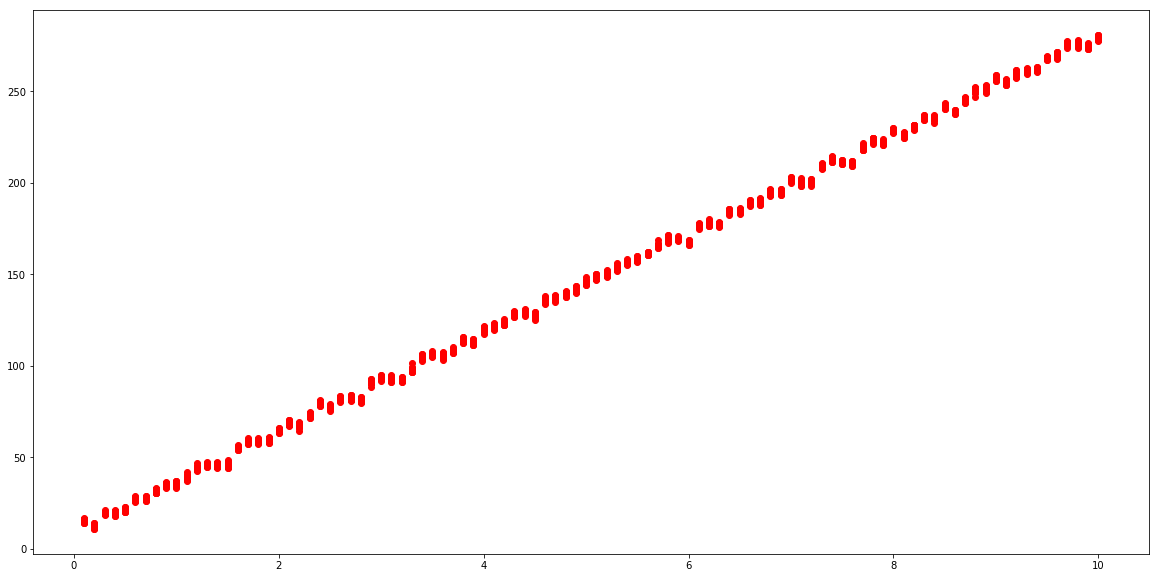

In [2]:
#for male
Mres=df[df['sex']==1]['response']
Mdos=df[df['sex']==1]['dose']
plt.figure(figsize=(20,10))
plt.scatter(Mdos,Mres,color='red')
Male = pd.DataFrame({'dose':Mdos,'response':Mres})

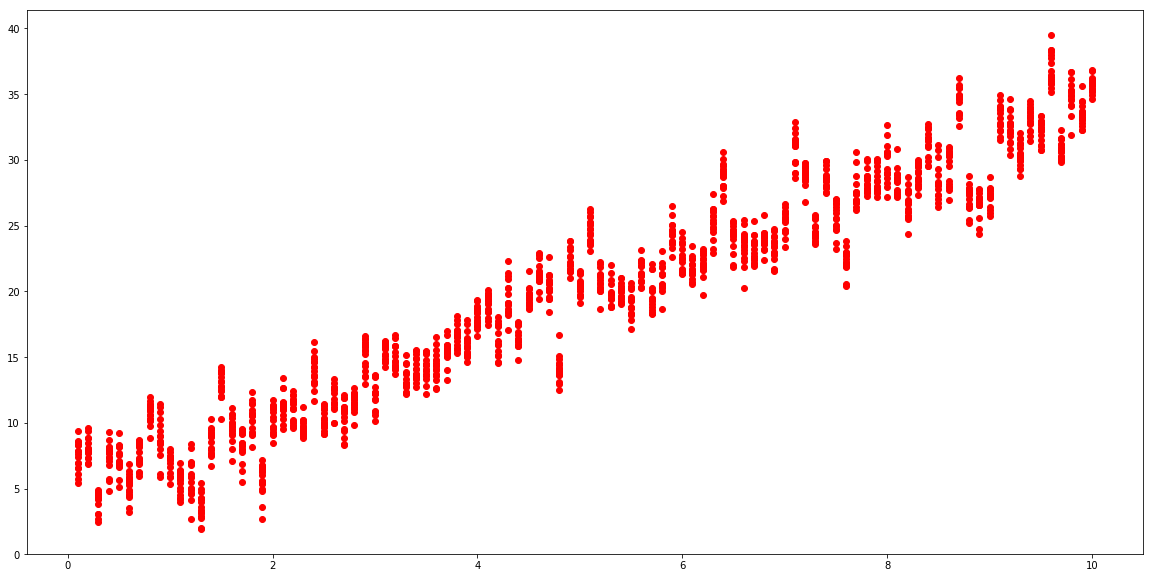

In [3]:
#for female
Fres=df[df['sex']==0]['response']
Fdos=df[df['sex']==0]['dose']
plt.figure(figsize=(20,10))
plt.scatter(Fdos,Fres,color='red')
Fale = pd.DataFrame({'dose':Fdos,'response':Fres})


In [4]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
# Split the data into training sets
Male_X_train = np.array(Male.dose[:-20])
Male_X_train = Male_X_train.reshape(-1,1)

Male_y_train = np.array(Male.response[:-20])
Male_y_train = Male_y_train.reshape(-1,1)

# Split the targets into testing sets
Male_X_test = np.array(Male.dose[20:])
Male_X_test = Male_X_test.reshape(-1,1)
Male_y_test = np.array(Male.response[20:])
Male_y_test = Male_y_test.reshape(-1,1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Male_X_train, Male_y_train)

# Make predictions using the testing set
Male_y_pred = regr.predict(Male_X_test)
print(Male_y_pred)
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Male_X_train, Male_y_train)

# Make predictions using the testing set
Male_y_pred = regr.predict(Male_X_test)

[[ 66.55279869]
 [ 69.25905405]
 [ 71.96530941]
 ...
 [274.93446146]
 [277.64071682]
 [280.34697218]]


In [6]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Male_y_test, Male_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %f' % r2_score(Male_y_test, Male_y_pred))


Coefficients: 
 [[27.06255361]]
Mean squared error: 5.17
Variance score: 0.999142


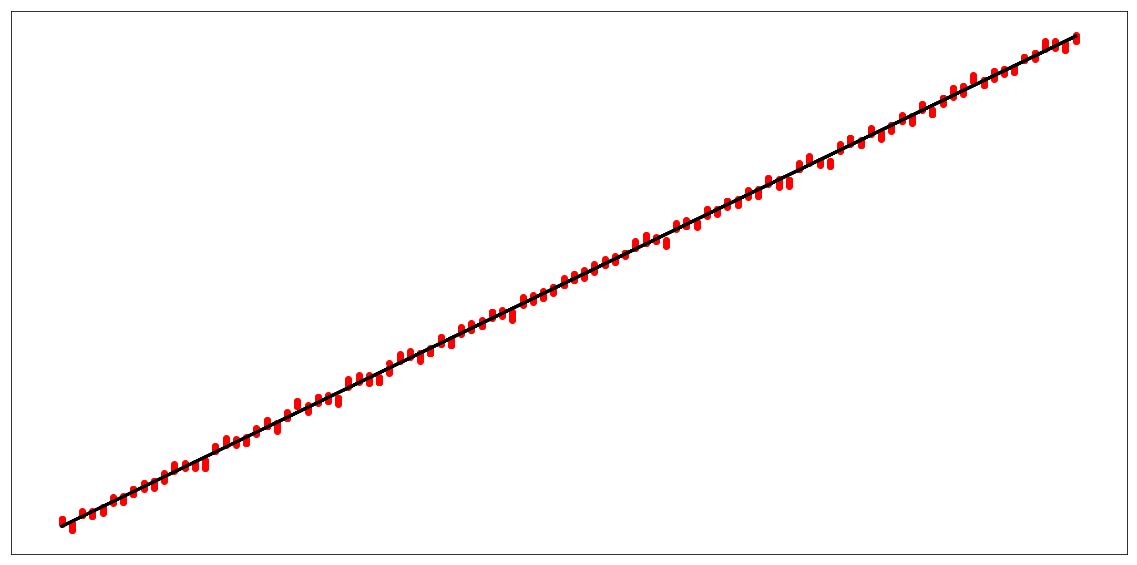

In [7]:

# Plot outputs
plt.figure(figsize=(20,10))
plt.scatter(Male_X_test, Male_y_test,  color='red')
plt.plot(Male_X_test, Male_y_pred, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [8]:
# Split the data into training sets
Fale_X_train = np.array(Fale.dose[:-20])
Fale_X_train = Fale_X_train.reshape(-1,1)

Fale_y_train = np.array(Fale.response[:-20])
Fale_y_train = Fale_y_train.reshape(-1,1)

# Split the targets into testing sets
Fale_X_test = np.array(Fale.dose[20:])
Fale_X_test = Fale_X_test.reshape(-1,1)
Fale_y_test = np.array(Fale.response[20:])
Fale_y_test = Fale_y_test.reshape(-1,1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Fale_X_train, Fale_y_train)

# Make predictions using the testing set
Fale_y_pred = regr.predict(Fale_X_test)
print(Fale_y_pred)
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Fale_X_train, Fale_y_train)

# Make predictions using the testing set
Fale_y_pred = regr.predict(Fale_X_test)

[[10.96234985]
 [11.25663838]
 [11.5509269 ]
 ...
 [33.62256611]
 [33.91685463]
 [34.21114316]]


In [9]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Fale_y_test, Fale_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Fale_y_test, Fale_y_pred))


Coefficients: 
 [[2.94288523]]
Mean squared error: 5.51
Variance score: 0.93


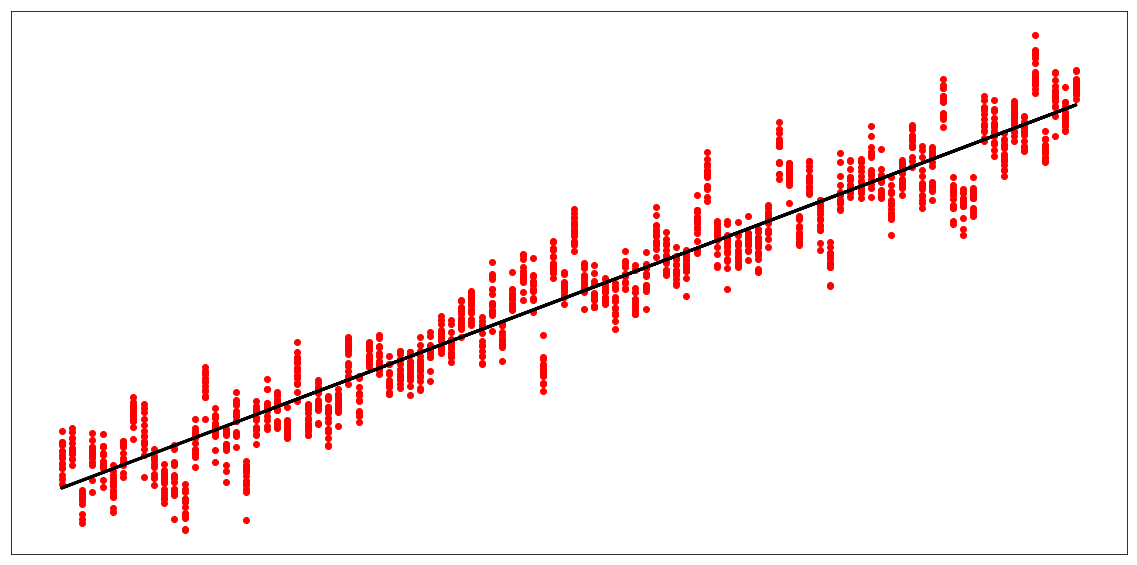

In [10]:

# Plot outputs
plt.figure(figsize=(20,10))
plt.scatter(Fale_X_test, Fale_y_test,  color='red')
plt.plot(Fale_X_test, Fale_y_pred, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [11]:
Male_X_train
Male_y_train
Male_X_test
Male_y_test
b1=0
c=0
for i in range(len(Male_X_train)):
    b1 = b1+((Male_X_train[i]-np.mean(Male_X_train))*(Male_y_train[i]-np.mean(Male_y_train)))
for i in range(len(Male_X_train)):
    c=c+(pow((Male_X_train[i]-np.mean(Male_X_train)),2))
b1=b1/c
print('b1 = ',b1)

b0=np.mean(Male_y_train)-b1*np.mean(Male_X_train)
print('b0 = ',b0)

Y_pred = []
for i in range(len(Male_X_test)):
    y= b0+b1*Male_X_test[i]
    Y_pred.append(y)


Ma = [Male_y_test[i][0] for i in range(len(Male_y_test))]
Pa = [Y_pred[i][0] for i in range(len(Male_y_test))]
d = {'Real Value':Ma,'Predicted Value':Pa,'Error':np.subtract(Ma,Pa)}
print(pd.DataFrame(data=d).head(10))


rmse = np.linalg.norm(Y_pred-Male_y_test)/np.sqrt(len(Male_X_test))
print('Root Mean Squared Error/Deviation = ',rmse)


ssr,tss = 0,0
for i in range(len(Male_y_test)):
    ssr= ssr+pow(Y_pred[i]-np.mean(Male_y_test),2)
    tss= tss+pow(Male_y_test[i]-np.mean(Male_y_test),2)

print('SSR = ',ssr)
print('SST/TSS = ',tss )

Rsq = ssr/tss
print('R-Sqaure = ',Rsq)

AdRsq = 1-((len(Male_y_test)-1)*(1-Rsq)/(len(Male_y_test)-1-1))  
print("Adjusted R-square = ",AdRsq)


b1 =  [27.06255361]
b0 =  [9.72143612]
   Real Value  Predicted Value     Error
0       67.42        66.552799  0.867201
1       68.30        69.259054 -0.959054
2       74.78        71.965309  2.814691
3       79.89        74.671565  5.218435
4       77.95        77.377820  0.572180
5       82.89        80.084075  2.805925
6       82.06        82.790331 -0.730331
7       82.27        85.496586 -3.226586
8       90.81        88.202842  2.607158
9       94.28        90.909097  3.370903
Root Mean Squared Error/Deviation =  2.274017269657808
SSR =  [9521915.15546865]
SST/TSS =  [9528142.20317437]
R-Sqaure =  [0.99934646]
Adjusted R-square =  [0.99934604]


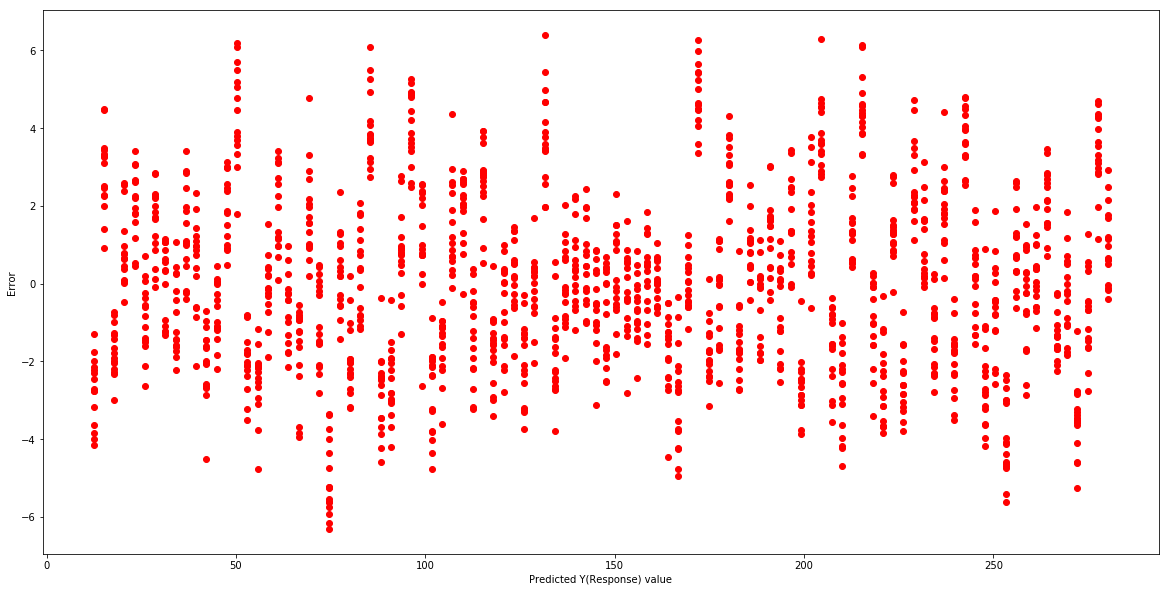

In [12]:
#Plot the preddicted value VS error
error = []
error.append(Y_pred - Male_y_test)
plt.figure(figsize=(20,10))
plt.scatter(Y_pred,error,color='red',linewidths=1)
plt.xlabel("Predicted Y(Response) value")
plt.ylabel("Error")
plt.show()

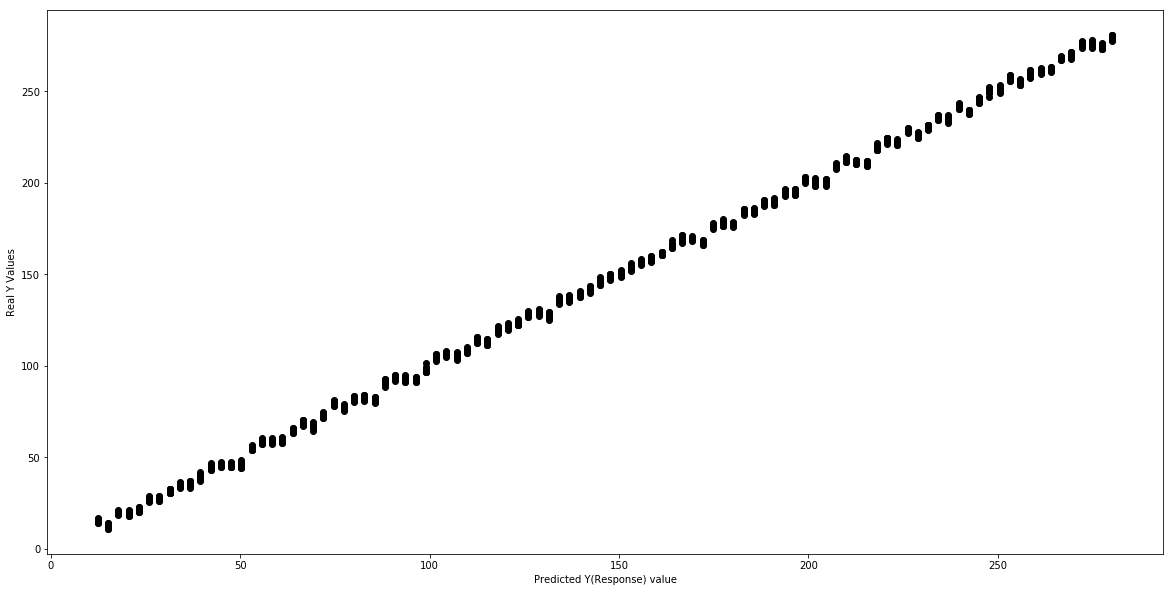

In [13]:
#Plot the preddicted value VS real value
plt.figure(figsize=(20,10))
plt.scatter(Y_pred,Male_y_test,color='black',linewidths=1)
plt.xlabel("Predicted Y(Response) value")
plt.ylabel("Real Y Values")

plt.show()

(array([  3.,   8.,   8.,  16.,  34.,  46.,  71., 118., 122., 129., 131.,
        139., 155., 142.,  93.,  74.,  81.,  58.,  55.,  28.,  38.,  15.,
          7.,   9.]),
 array([-6.30843523, -5.77921179, -5.24998835, -4.72076491, -4.19154147,
        -3.66231803, -3.13309459, -2.60387115, -2.0746477 , -1.54542426,
        -1.01620082, -0.48697738,  0.04224606,  0.5714695 ,  1.10069294,
         1.62991638,  2.15913982,  2.68836326,  3.2175867 ,  3.74681014,
         4.27603358,  4.80525702,  5.33448046,  5.8637039 ,  6.39292734]),
 <a list of 24 Patch objects>)

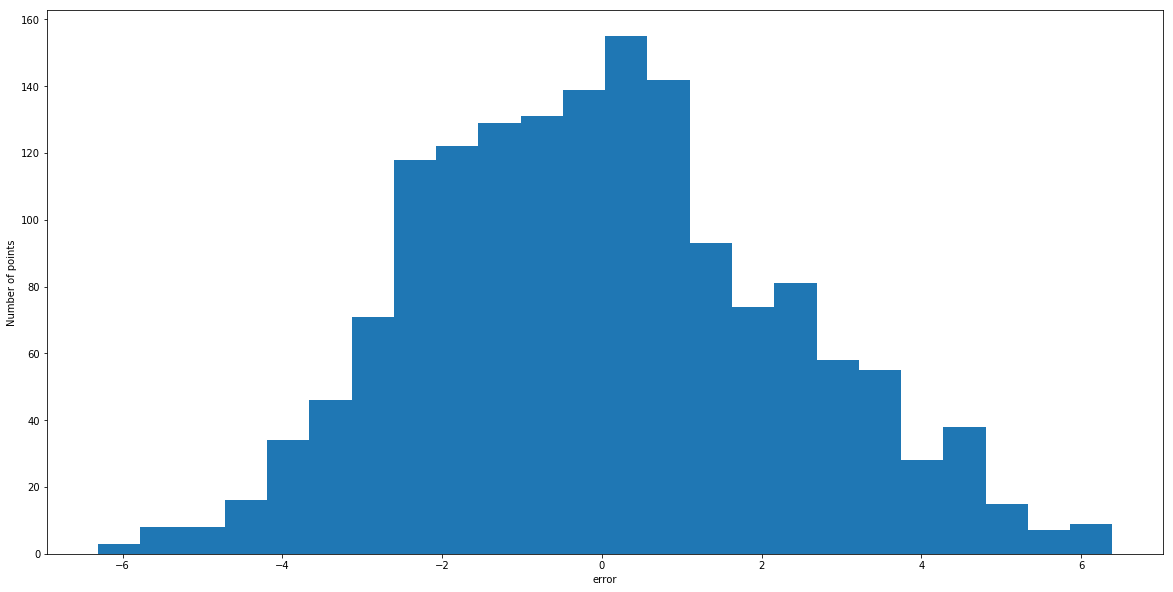

In [14]:
#Gaussian Plot
err = [error[0][i][0] for i in range(len(error[0]))]
plt.figure(figsize=(20,10))
plt.xlabel("error")
plt.ylabel("Number of points")
plt.hist(err, bins='auto')

For Female

In [15]:
Fale_X_train
Fale_y_train
Fale_X_test
Fale_y_test
b1=0
c=0
for i in range(len(Fale_X_train)):
    b1 = b1+((Fale_X_train[i]-np.mean(Fale_X_train))*(Fale_y_train[i]-np.mean(Fale_y_train)))
for i in range(len(Fale_X_train)):
    c=c+(pow((Fale_X_train[i]-np.mean(Fale_X_train)),2))
b1=b1/c
print('b1 = ',b1)

b0=np.mean(Fale_y_train)-b1*np.mean(Fale_X_train)
print('b0 = ',b0)

Y_pred = []
for i in range(len(Fale_X_test)):
    y= b0+b1*Fale_X_test[i]
    Y_pred.append(y)


Ma = [Fale_y_test[i][0] for i in range(len(Fale_y_test))]
Pa = [Y_pred[i][0] for i in range(len(Fale_y_test))]
d = {'Real Value':Ma,'Predicted Value':Pa,'Error':np.subtract(Ma,Pa)}
print(pd.DataFrame(data=d).head(20))


rmse = np.linalg.norm(Y_pred-Fale_y_test)/np.sqrt(len(Fale_X_test))
print('Root Mean Squared Error/Deviation = ',rmse)

ssr,tss = 0,0
for i in range(len(Fale_y_test)):
    ssr= ssr+pow(Y_pred[i]-np.mean(Fale_y_test),2)
    tss= tss+pow(Fale_y_test[i]-np.mean(Fale_y_test),2)

print('SSR = ',ssr)
print('SST/TSS = ',tss )

Rsq = ssr/tss
print('R-Sqaure = ',Rsq)

AdRsq = 1-((len(Fale_y_test)-1)*(1-Rsq)/(len(Fale_y_test)-1-1))  
print("Adjusted R-square = ",AdRsq)


b1 =  [2.94288523]
b0 =  [4.78229088]
    Real Value  Predicted Value     Error
0        12.61        10.962350  1.647650
1        10.20        11.256638 -1.056638
2         9.72        11.550927 -1.830927
3        16.16        11.845215  4.314785
4        11.37        12.139504 -0.769504
5        12.30        12.433792 -0.133792
6        12.08        12.728081 -0.648081
7        11.41        13.022370 -1.612370
8        14.33        13.316658  1.013342
9        13.60        13.610947 -0.010947
10       14.28        13.905235  0.374765
11       14.08        14.199524 -0.119524
12       12.23        14.493812 -2.263812
13       13.68        14.788101 -1.108101
14       15.40        15.082389  0.317611
15       14.76        15.376678 -0.616678
16       15.05        15.670966 -0.620966
17       16.53        15.965255  0.564745
18       15.27        16.259543 -0.989543
19       17.36        16.553832  0.806168
Root Mean Squared Error/Deviation =  2.3479685910558494
SSR =  [112598.76847048]

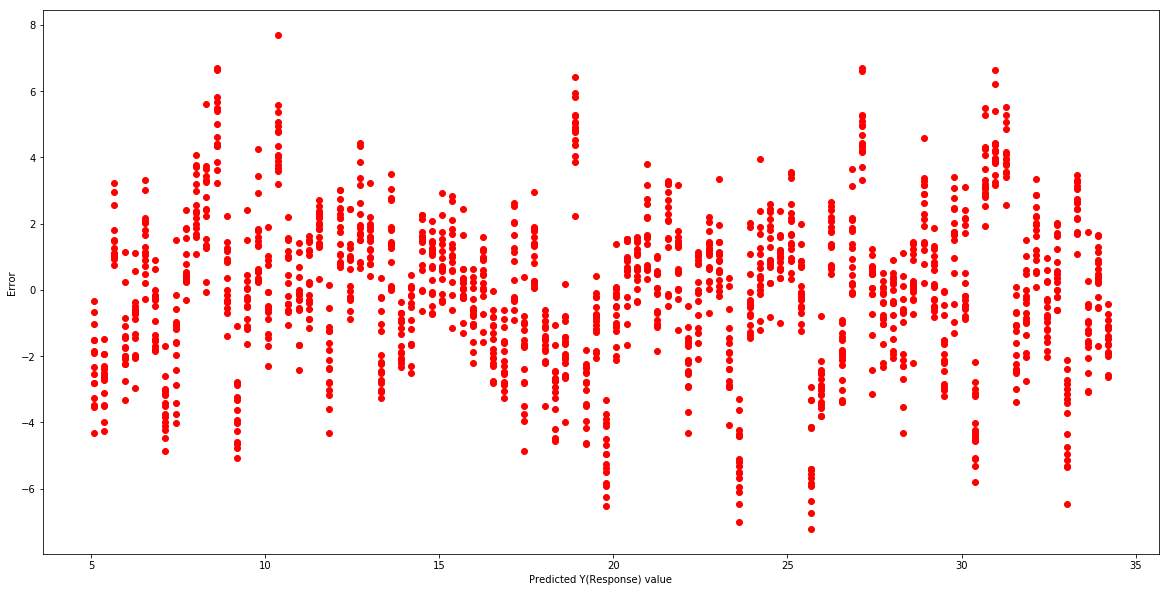

In [16]:
#Plot the preddicted value VS error
error = []
error.append(Y_pred - Fale_y_test)
plt.figure(figsize=(20,10))
plt.scatter(Y_pred,error,color='red',linewidths=1)
plt.xlabel("Predicted Y(Response) value")
plt.ylabel("Error")
plt.show()

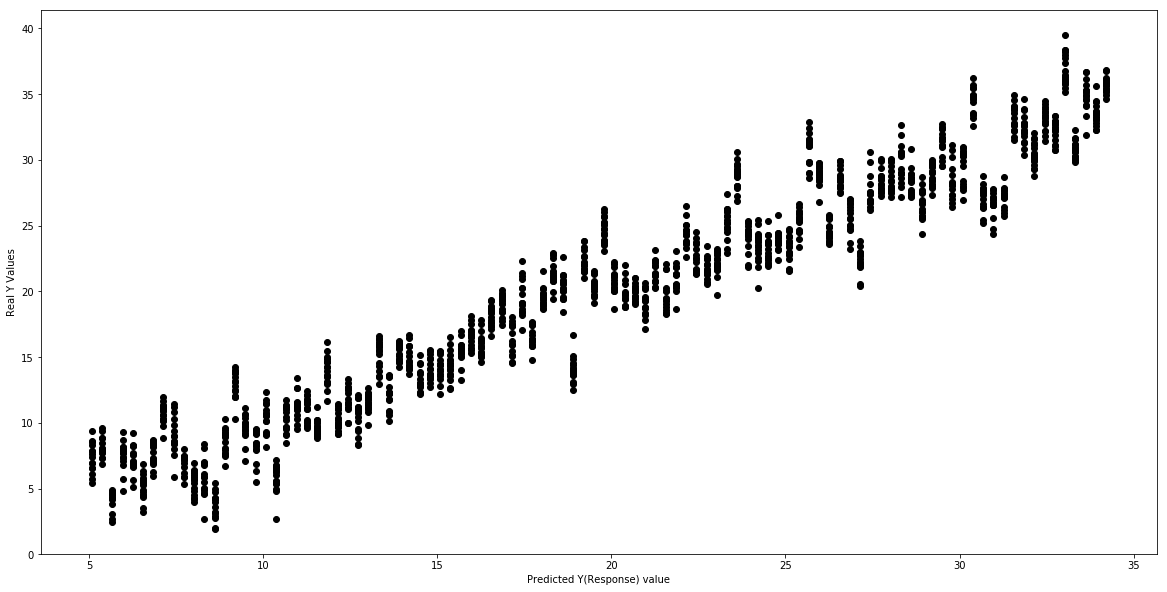

In [17]:
#Plot the preddicted value VS real value
plt.figure(figsize=(20,10))
plt.scatter(Y_pred,Fale_y_test,color='black',linewidths=1)
plt.xlabel("Predicted Y(Response) value")
plt.ylabel("Real Y Values")

plt.show()

(array([  3.,   5.,   8.,  15.,  15.,  30.,  26.,  45.,  67.,  82.,  95.,
         99., 129., 146., 151., 135., 152., 108.,  76.,  43.,  47.,  30.,
         29.,  18.,  14.,   4.,   5.,   2.,   1.]),
 array([-7.213224  , -6.69918963, -6.18515526, -5.67112089, -5.15708651,
        -4.64305214, -4.12901777, -3.61498339, -3.10094902, -2.58691465,
        -2.07288028, -1.5588459 , -1.04481153, -0.53077716, -0.01674278,
         0.49729159,  1.01132596,  1.52536033,  2.03939471,  2.55342908,
         3.06746345,  3.58149783,  4.0955322 ,  4.60956657,  5.12360094,
         5.63763532,  6.15166969,  6.66570406,  7.17973844,  7.69377281]),
 <a list of 29 Patch objects>)

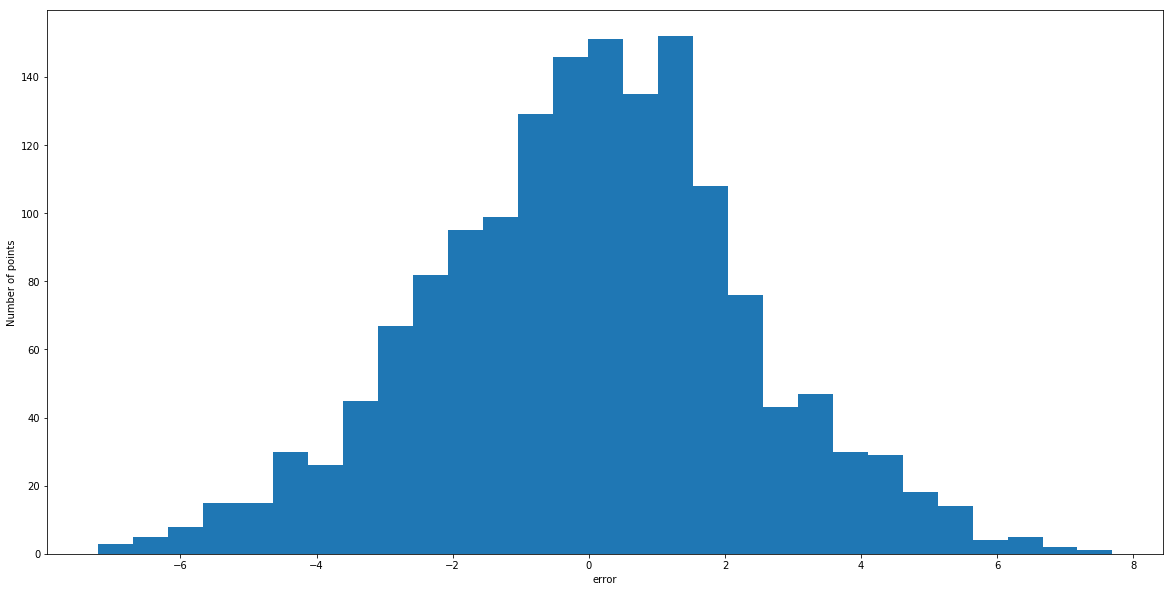

In [18]:
#Gaussian Plot
err = [error[0][i][0] for i in range(len(error[0]))]
plt.figure(figsize=(20,10))
plt.xlabel("error")
plt.ylabel("Number of points")
plt.hist(err, bins='auto')

In [19]:
import statsmodels.api as sm
# Note the difference in argument order
model = sm.OLS(Male_y_train,Male_X_train).fit()
predictions = model.predict(Male_X_test) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.495e+06
Date:                Wed, 13 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:08:21   Log-Likelihood:                -4889.7
No. Observations:                1580   AIC:                             9781.
Df Residuals:                    1579   BIC:                             9787.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            28.5255      0.023   1222.731      0.000      28.480      28.571
==============================================================================
Omnibus:                       99.801   Durbin-Watson:                   0.515
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.132
Skew:                          -0.061   Prob(JB):                     8.65e-09
Kurtosis:                       2.259   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""